In [252]:
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

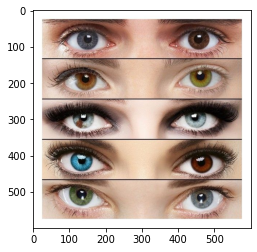

In [253]:
# Ejercicio: extraer los píxeles del tablero (color verde)
# Primera parte: encontrar un espacio de color conveniente para la discriminación

img= cv.imread(r'C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\TP3\eyes.jpg')
plt.imshow(img[:,:,::-1])
plt.show()
img_g = cv.imread(r'C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\TP3\eyes.jpg',cv.IMREAD_GRAYSCALE)

In [254]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Suavizamos la imagen
#=====================
gray = cv.medianBlur(gray,5)
#gray = cv.GaussianBlur(gray,(7,7),cv.BORDER_CONSTANT)
#cv.imshow('eyes',gray)
#cv.waitKey(0)
#cv.destroyAllWindows()

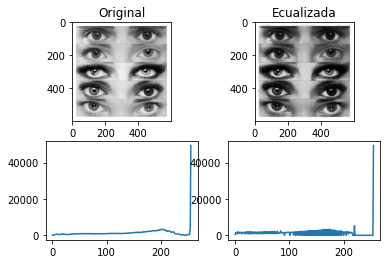

In [255]:
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(gray, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1,bins1 = np.histogram(gray.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen ecualizada
img_eqzd = cv.equalizeHist(gray)
ax2=plt.subplot(222)
ax2.imshow(img_eqzd, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Ecualizada')

hist2,bins2 = np.histogram(img_eqzd.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()

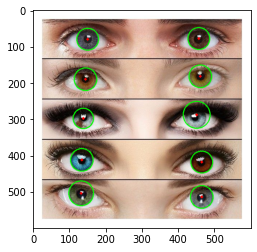

In [256]:
# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================
img_out = img.copy()
circles=[]
#circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=70,param1=110,param2=40,minRadius=12,maxRadius=50)
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=40,param1=120,param2=34,minRadius=15,maxRadius=54)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
#cv.imshow('detected circles',img_out)
#cv.waitKey(0)
#cv.destroyAllWindows()
plt.imshow(img_out[:,:,::-1])
plt.show()

In [257]:
circles_1=circles[0]
sorted=circles_1[circles_1[:,1].argsort()]
print("Array after sorting\n",sorted)

Array after sorting
 [[456  78  30]
 [150  80  30]
 [460 182  31]
 [144 190  31]
 [450 288  37]
 [138 298  28]
 [134 412  31]
 [464 418  30]
 [132 504  34]
 [464 514  31]]


In [258]:
calc=[]
for i in range(0,(sorted.shape[0]-2)):
    #for j in range(0,(circles.shape[2]-1)):
    if (abs(int(sorted[i][1])-int(sorted[i+1][1]))<10):
        print(abs(int(sorted[i][1])-int(sorted[i+1][1])))
        print(int(sorted[i][1]),int(sorted[i+1][1]))
        dist_=abs(int(sorted[i][0])-int(sorted[i+1][0])),"pixeles"
        print("distancia entre los ojos =",dist_,"pixeles")
        calc.append(dist_)
    elif (abs(int(sorted[i+1][1])-int(sorted[i+2][1]))<10):
        print(abs(int(sorted[i+1][1])-int(sorted[i+2][1])))
        print(int(sorted[i+1][1]),int(sorted[i+2][1]))
        dist_=abs(int(sorted[i+1][0])-int(sorted[i+2][0]))
        print("distancia entre los ojos =",dist_,"pixeles")
        calc.append(dist_)   
    print(calc)

2
78 80
distancia entre los ojos = (306, 'pixeles') pixeles
[(306, 'pixeles')]
8
182 190
distancia entre los ojos = 316 pixeles
[(306, 'pixeles'), 316]
8
182 190
distancia entre los ojos = (316, 'pixeles') pixeles
[(306, 'pixeles'), 316, (316, 'pixeles')]
[(306, 'pixeles'), 316, (316, 'pixeles')]
[(306, 'pixeles'), 316, (316, 'pixeles')]
6
412 418
distancia entre los ojos = 330 pixeles
[(306, 'pixeles'), 316, (316, 'pixeles'), 330]
6
412 418
distancia entre los ojos = (330, 'pixeles') pixeles
[(306, 'pixeles'), 316, (316, 'pixeles'), 330, (330, 'pixeles')]
[(306, 'pixeles'), 316, (316, 'pixeles'), 330, (330, 'pixeles')]


Distancia entre los ojos = 
(330, 'pixeles'),
[(304, 'pixeles'), (316, 'pixeles'),(330, 'pixeles')]
[(304, 'pixeles'), (316, 'pixeles'), (330, 'pixeles')]

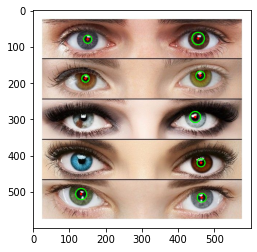

In [259]:
img_out = img.copy()
circles=[]
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=60,param1=25,param2=25,minRadius=3,maxRadius=18)


#circles2 = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=100,param1=190,param2=18,minRadius=8,maxRadius=19)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
#cv.imshow('detected circles',img_out)
#cv.waitKey(0)
#cv.destroyAllWindows()
plt.imshow(img_out[:,:,::-1])
plt.show()

## variantes con filtros...no encuentro uno que funcione

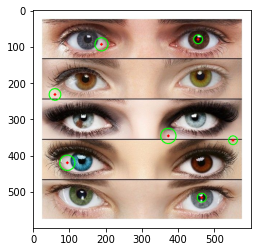

In [260]:
img_out = img.copy()
circles=[]
circles = cv.HoughCircles(img_eqzd,cv.HOUGH_GRADIENT,1,minDist=160,param1=25,param2=25,minRadius=5,maxRadius=22)


#circles2 = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=100,param1=190,param2=18,minRadius=8,maxRadius=19)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
#cv.imshow('detected circles',img_out)
#cv.waitKey(0)
#cv.destroyAllWindows()
plt.imshow(img_out[:,:,::-1])
plt.show()